# Classifier Diagnostics

Task: plot a confusion matrix, find images that were misclassified

## Setup

You do not need to read or modify the code in this section to successfully complete this assignment.

In [1]:
# Import fastai code.
from fastai.vision.all import *

# Set a seed for reproducibility.
set_seed(0, reproducible=True)

### Set up the dataset

In [2]:
path = untar_data(URLs.PETS)/'images'
image_files = get_image_files(path).sorted()
def cat_or_dog(filename):
    # Cat images have filenames that start with a capital letter.
    return 'cat' if filename[0].isupper() else 'dog'
labels = [cat_or_dog(path.name) for path in image_files]

### Train the classifier

In [3]:
dataloaders = ImageDataLoaders.from_lists(
    path=path, fnames=image_files, labels=labels,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224)
)

/usr/local/Caskroom/miniconda/base/envs/fa22/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/fa22/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.150135,0.038403,0.981732,06:35


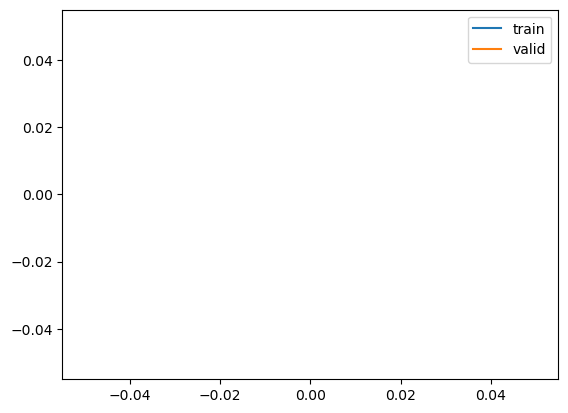

In [4]:
learn = vision_learner(
    dls=dataloaders,
    arch=resnet18,
    metrics=accuracy
)
learn.fine_tune(epochs=0)
learn.recorder.plot_loss()

## Task

We've given you a classifier (the `learn` object). It makes a few mistakes; can you find them?

Follow these steps:

1. Show one batch from each of the training and validation sets. (Find the `DataLoader` objects at `dataloaders.train` and `dataloaders.valid`; each of them has a `.show_batch()` method.)

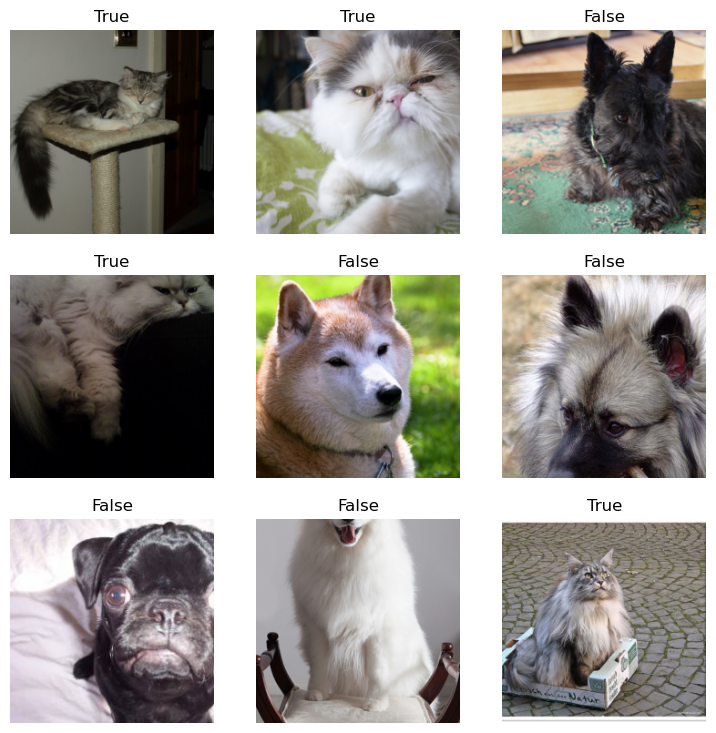

In [5]:
# your code here
dataloaders.train.show_batch()

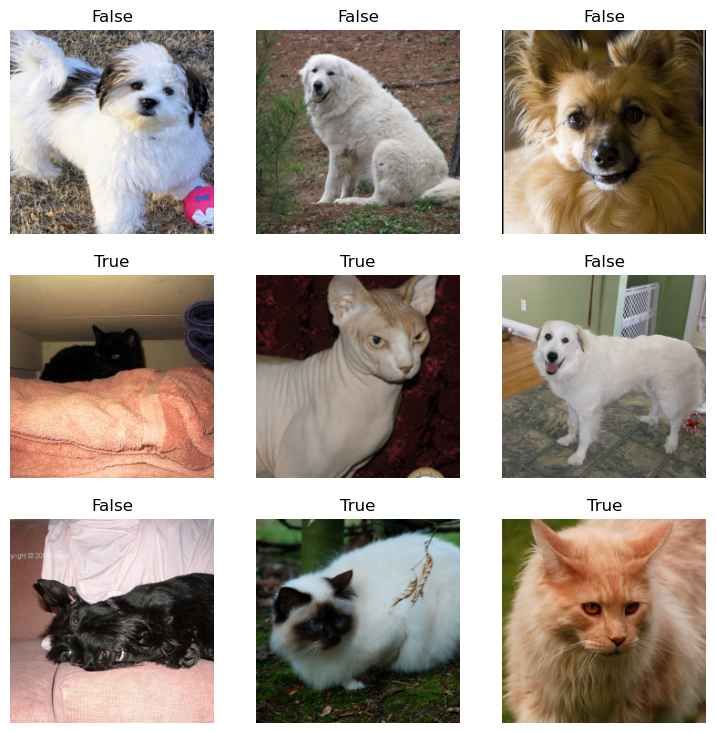

In [6]:
# your code here
dataloaders.valid.show_batch()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


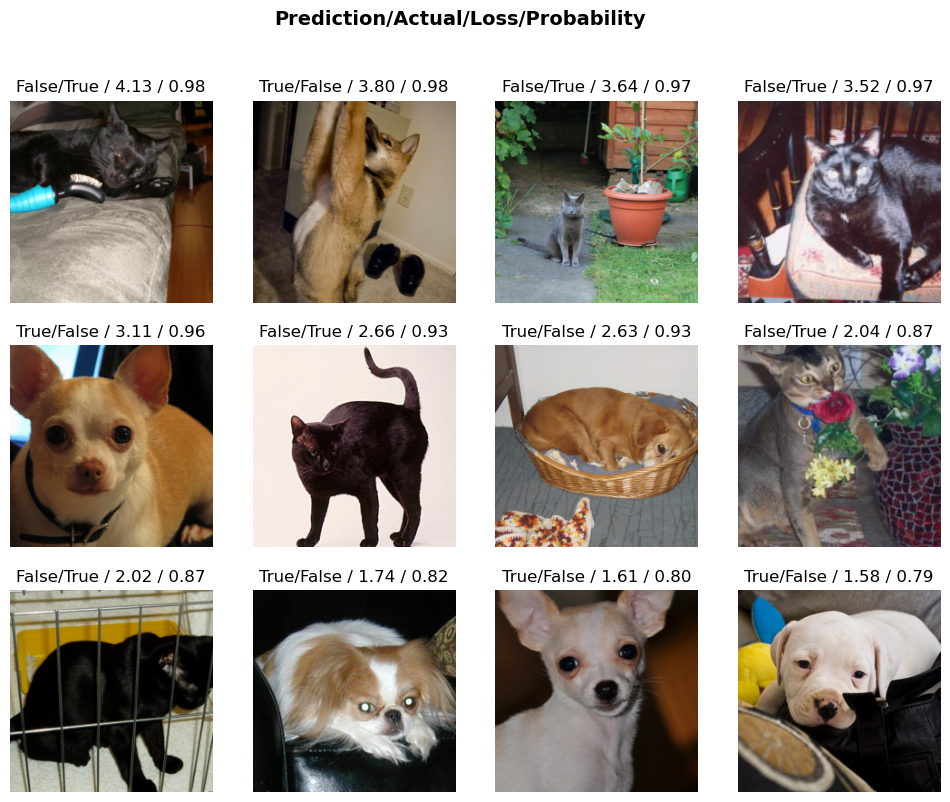

In [11]:
interp.plot_top_losses(12)

2. Look at the 

Compute the *accuracy* and *error rate* of this classifier on the validation set (`accuracy(interp.preds, interp.targs)`). Check that this number matches the last accuracy figure reported while training above. Multiply this by the number of images in the validation set to give the actual number of misclassified images.

*Hints*:

- You may need `WHATEVER.item()` to get a plain number instead of a `Tensor`.
- `DataLoader`s have a `.n` attribute that gives the number of images in them.

In [7]:

# your code here
print("Accuracy:", accuracy(interp.preds, interp.targs).item())
print("Error rate: ", error_rate(interp.preds, interp.targs).item())
print(f"Number of images incorrect: {round(error_rate(interp.preds, interp.targs).item() * dataloaders.valid.n)} out of {dataloaders.valid.n}")

AttributeError: 'ClassificationInterpretation' object has no attribute 'preds'

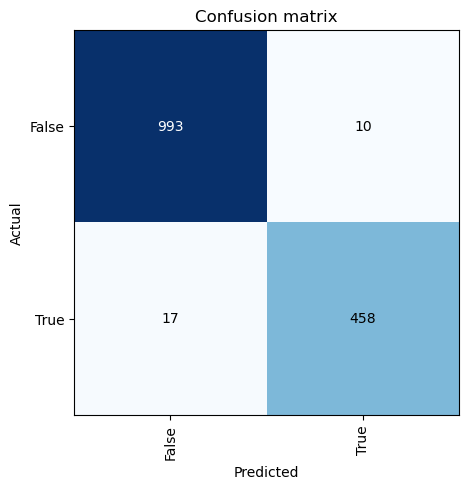

In [9]:
interp.plot_confusion_matrix()

3. Plot the confusion matrix on the validation set (see chapter 2).

In [ ]:
interp.plot_confusion_matrix()

5. Plot the top 12 losses in the validation set.

In [ ]:
interp.plot_top_losses(12)

4. Compute the accuracy on the *training* set. (Since "dataset 0" is the training set and "dataset 1" is the validation set, we can use `interp_train = ClassificationInterpretation.from_learner(learn, ds_idx=0)`)

In [ ]:
interp_train = ClassificationInterpretation.from_learner(learn, ds_idx=0)
# your code here
print("Accuracy:", accuracy(interp_train.preds, interp_train.targs).item())

## Analysis

1. **How many dogs in the validation set were misclassified as cats? Vice versa?**

X out of XX images were incorrectly labeled "cat".

Y out of YY images were incorrectly labeled "dog".

2. **If we had only looked at the accuracy on the training set, would we have *overestimated* or *underestimated* how well the classifier would have performed on the validation set? By how much?**

*your answer here*

3. Examine the top losses plot.
  1. Explain what the four things above each image mean.
  2. Explain why some correctly classified images appear in the "top losses".
  3. What is the relationship between "loss" and "probability"?

*your answer here*